In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import pickle


C:\Users\abhis\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Load and preprocess the CIFAR-10 dataset

In [3]:
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train = unpickle("cifar-10-batches-py\data_batch_1")
test = unpickle("cifar-10-batches-py\data_batch_2")
x_train = np.array(train[b'data'])
y_train = np.array(train[b'labels'])
x_test = np.array(test[b'data'])
y_test = np.array(test[b'labels'])
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)


In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to the range [0, 1]

Define the network architecture

In [7]:
ffnn = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 input images
    Dense(256, activation='relu'),    # First hidden layer with ReLU activation
    Dense(128, activation='relu'),    # Second hidden layer with ReLU activation
    Dense(10, activation='softmax')    # Output layer with softmax activation for classification
])
ffnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
fitted = ffnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
313/313 [==============================] - 2s 6ms/step - loss: 2.0640 - accuracy: 0.2499 - val_loss: 1.9759 - val_accuracy: 0.2893
Epoch 2/10
313/313 [==============================] - 2s 5ms/step - loss: 1.8804 - accuracy: 0.3329 - val_loss: 1.8889 - val_accuracy: 0.3181
Epoch 3/10
313/313 [==============================] - 2s 5ms/step - loss: 1.8114 - accuracy: 0.3519 - val_loss: 1.8329 - val_accuracy: 0.3455
Epoch 4/10
313/313 [==============================] - 2s 5ms/step - loss: 1.7560 - accuracy: 0.3787 - val_loss: 1.9298 - val_accuracy: 0.3075
Epoch 5/10
313/313 [==============================] - 2s 6ms/step - loss: 1.7122 - accuracy: 0.3895 - val_loss: 1.8106 - val_accuracy: 0.3556
Epoch 6/10
313/313 [==============================] - 2s 5ms/step - loss: 1.6702 - accuracy: 0.4099 - val_loss: 1.7396 - val_accuracy: 0.3839
Epoch 7/10
313/313 [==============================] - 2s 5ms/step - loss: 1.6409 - accuracy: 0.4135 - val_loss: 1.7435 - val_accuracy: 0.3786
Epoch 

Evaluate the network

In [9]:
test_loss, test_acc = ffnn.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 1.7085 - accuracy: 0.3921
Test accuracy: 39.21%


Plot the training loss and accuracy

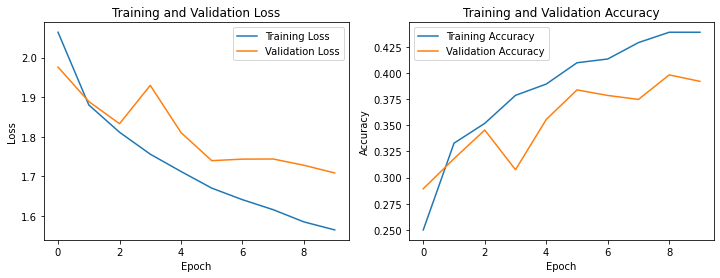

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fitted.history['loss'], label='Training Loss')
plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(fitted.history['accuracy'], label='Training Accuracy')
plt.plot(fitted.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()